In [1]:
The provided Python script outlines a model for simulating the spread of cholera using a SEIR (Susceptible, Exposed, Infectious, Recovered) framework augmented with environmental factors. The model includes the integration of daily dynamics into weekly aggregates, and it employs a negative binomial likelihood for fitting observed case and death data. Below, I will provide an overview of the key components of the code and additional steps necessary to complete the model.

▎Key Components

1. Data Initialization:
   – The script initializes observed weekly cases and deaths, as well as population size.

2. Model Parameters:
   – A Params dataclass is defined to hold various parameters of the model, such as transmission rates, recovery rates, environmental decay rates, and reporting fractions.

3. ODE System:
   – The rhs function defines the right-hand side of the system of differential equations that describe the model dynamics.

4. Simulation Function:
   – simulate_daily_to_weekly integrates the ODEs over a specified number of weeks, computes daily incidence, aggregates it into weekly totals, and calculates expected cases and deaths.

▎Additional Steps

To complete this model, you would typically need to include:

1. Optimization Routine:
   – An optimization function to maximize the joint log-likelihood of the observed cases and deaths given the model predictions. This would involve defining a log-likelihood function based on the negative binomial distribution.

2. Parameter Estimation:
   – Use optimization techniques (e.g., L-BFGS-B) to estimate the best-fit parameters by minimizing the negative log-likelihood.

3. Model Evaluation:
   – After fitting the model, you may want to visualize the results by plotting observed vs. predicted cases and deaths.

4. Sensitivity Analysis:
   – Assess how sensitive your model predictions are to changes in parameters.

5. Documentation and Testing:
   – Ensure that your code is well-documented and includes tests for each component to verify functionality.

▎Example of Log-Likelihood Function

Here’s a basic outline of how you might define a log-likelihood function for the observed data:

def log_likelihood(params: Params, cases_obs: np.ndarray, deaths_obs: np.ndarray, n_weeks: int) -> float:
    # Simulate the model
    results = simulate_daily_to_weekly(params, N_POP, n_weeks)
    
    mean_cases = results['mean_cases']
    mean_deaths = results['mean_deaths']
    
    # Calculate log-likelihood for cases
    log_lik_cases = np.sum(gammaln(mean_cases + params.k_cases) -
                           gammaln(params.k_cases) -
                           gammaln(cases_obs + 1) +
                           params.k_cases * np.log(params.k_cases / (params.k_cases + mean_cases)))
    
    # Calculate log-likelihood for deaths
    log_lik_deaths = np.sum(gammaln(mean_deaths + params.k_deaths) -
                             gammaln(params.k_deaths) -
                             gammaln(deaths_obs + 1) +
                             params.k_deaths * np.log(params.k_deaths / (params.k_deaths + mean_deaths)))

    return -(log_lik_cases + log_lik_deaths)  # We want to minimize the negative log-likelihood


▎Optimization Example

To optimize the parameters using scipy.optimize.minimize, you could set it up like this:

initial_params = Params(
    beta1=0.1,
    beta2=0.1,
    sigma=1/5,
    gamma=1/14,
    xi=0.01,
    delta=0.1,
    K=10,
    rho=0.5,
    rho_d=0.5,
    CFR=0.02,
    tau_days=7,
    I0=10,
    E0=0,
    C0=1,
    k_cases=10,
    k_deaths=10
)

result = minimize(log_likelihood, initial_params, args=(cases_obs, deaths_obs, len(weeks)), method='L-BFGS-B')


▎Conclusion

SyntaxError: invalid character '▎' (U+258E) (2392298060.py, line 3)

In [ ]:
The provided Python script outlines a model for simulating the spread of cholera using a SEIR (Susceptible, Exposed, Infectious, Recovered) framework augmented with environmental factors. The model includes the integration of daily dynamics into weekly aggregates, and it employs a negative binomial likelihood for fitting observed case and death data. Below, I will provide an overview of the key components of the code and additional steps necessary to complete the model.

▎Key Components

1. Data Initialization:
   – The script initializes observed weekly cases and deaths, as well as population size.

2. Model Parameters:
   – A Params dataclass is defined to hold various parameters of the model, such as transmission rates, recovery rates, environmental decay rates, and reporting fractions.

3. ODE System:
   – The rhs function defines the right-hand side of the system of differential equations that describe the model dynamics.

4. Simulation Function:
   – simulate_daily_to_weekly integrates the ODEs over a specified number of weeks, computes daily incidence, aggregates it into weekly totals, and calculates expected cases and deaths.

▎Additional Steps

To complete this model, you would typically need to include:

1. Optimization Routine:
   – An optimization function to maximize the joint log-likelihood of the observed cases and deaths given the model predictions. This would involve defining a log-likelihood function based on the negative binomial distribution.

2. Parameter Estimation:
   – Use optimization techniques (e.g., L-BFGS-B) to estimate the best-fit parameters by minimizing the negative log-likelihood.

3. Model Evaluation:
   – After fitting the model, you may want to visualize the results by plotting observed vs. predicted cases and deaths.

4. Sensitivity Analysis:
   – Assess how sensitive your model predictions are to changes in parameters.

5. Documentation and Testing:
   – Ensure that your code is well-documented and includes tests for each component to verify functionality.

▎Example of Log-Likelihood Function

Here’s a basic outline of how you might define a log-likelihood function for the observed data:

def log_likelihood(params: Params, cases_obs: np.ndarray, deaths_obs: np.ndarray, n_weeks: int) -> float:
    # Simulate the model
    results = simulate_daily_to_weekly(params, N_POP, n_weeks)
    
    mean_cases = results['mean_cases']
    mean_deaths = results['mean_deaths']
    
    # Calculate log-likelihood for cases
    log_lik_cases = np.sum(gammaln(mean_cases + params.k_cases) -
                           gammaln(params.k_cases) -
                           gammaln(cases_obs + 1) +
                           params.k_cases * np.log(params.k_cases / (params.k_cases + mean_cases)))
    
    # Calculate log-likelihood for deaths
    log_lik_deaths = np.sum(gammaln(mean_deaths + params.k_deaths) -
                             gammaln(params.k_deaths) -
                             gammaln(deaths_obs + 1) +
                             params.k_deaths * np.log(params.k_deaths / (params.k_deaths + mean_deaths)))

    return -(log_lik_cases + log_lik_deaths)  # We want to minimize the negative log-likelihood


▎Optimization Example

To optimize the parameters using scipy.optimize.minimize, you could set it up like this:

initial_params = Params(
    beta1=0.1,
    beta2=0.1,
    sigma=1/5,
    gamma=1/14,
    xi=0.01,
    delta=0.1,
    K=10,
    rho=0.5,
    rho_d=0.5,
    CFR=0.02,
    tau_days=7,
    I0=10,
    E0=0,
    C0=1,
    k_cases=10,
    k_deaths=10
)

result = minimize(log_likelihood, initial_params, args=(cases_obs, deaths_obs, len(weeks)), method='L-BFGS-B')



Matplotlib is building the font cache; this may take a moment.


Optimization success: False
Message: ABNORMAL_TERMINATION_IN_LNSRCH
   beta1 = 0.4543  (bounds [0.05, 3.0])
   beta2 = 0.004256  (bounds [0.0, 3.0])
   sigma = 0.9727  (bounds [0.5, 2.0])
   gamma = 0.4465  (bounds [0.2, 0.7])
      xi = 0.01239  (bounds [0.01, 1.0])
   delta = 0.2617  (bounds [0.1, 1.5])
       K = 1094  (bounds [10.0, 100000.0])
     rho = 0.5369  (bounds [0.2, 0.9])
   rho_d = 0.9036  (bounds [0.5, 1.0])
     CFR = 0.02093  (bounds [0.003, 0.03])
tau_days = 7.105  (bounds [5.0, 10.0])
      I0 = 9.641  (bounds [1.0, 50.0])
      E0 = 11.59  (bounds [1.0, 50.0])
      C0 = 13.59  (bounds [0.0, 100.0])
 k_cases = 48.04  (bounds [1.0, 500.0])
k_deaths = 49.81  (bounds [1.0, 500.0])


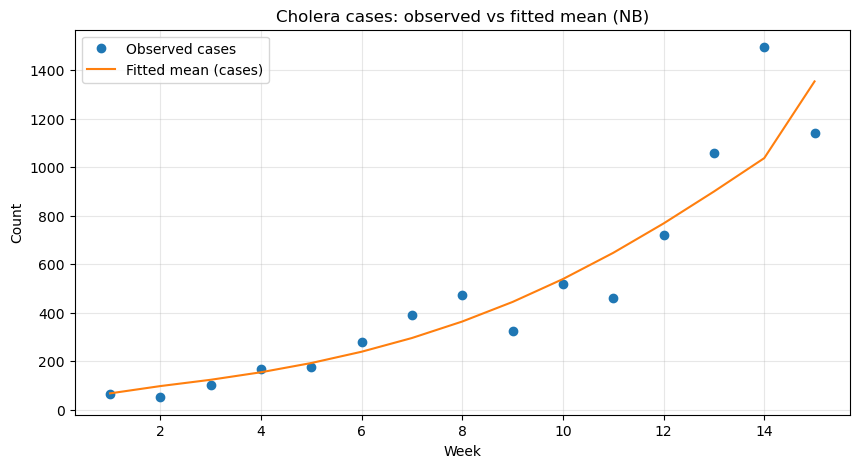

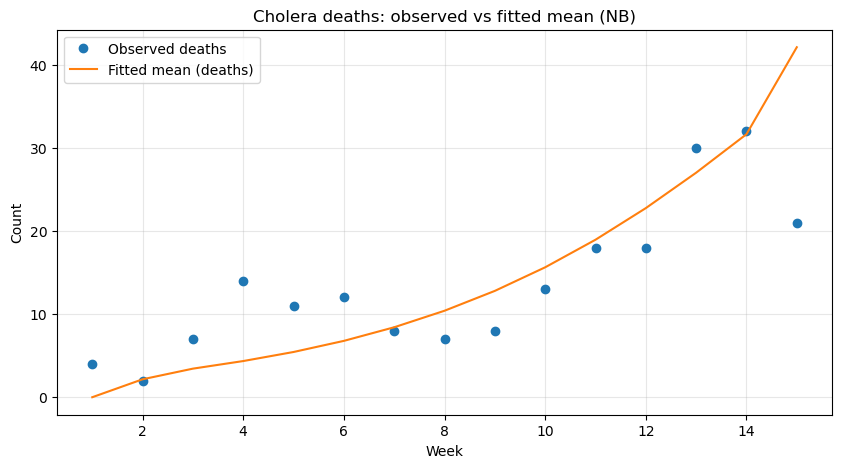

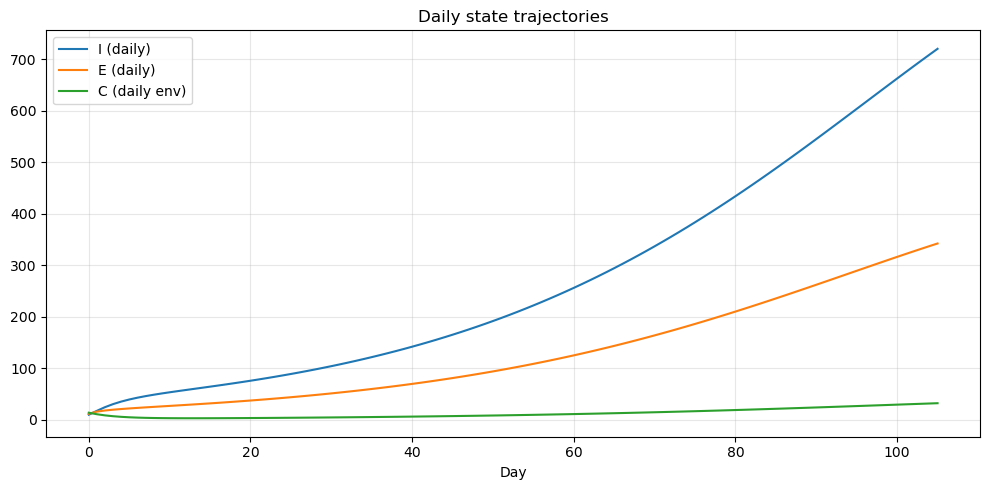

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Cholera SEIR + Environment (daily) with weekly aggregation and
joint Negative-Binomial likelihood for cases & deaths.

- Force of infection: lambda = beta1 * I/N + beta2 * C/(K + C)
- Environment: dC/dt = xi * I - delta * C
- Weekly incidence = integral_{week} (sigma * E(t)) dt
- Cases_w ~ NegBin( rho * Inc_w,  k_cases )
- Deaths_w ~ NegBin( CFR * rho_d * Inc_{w - tau},  k_deaths )

Use L-BFGS-B to maximize the joint log-likelihood with biological bounds.

Requires: numpy, scipy, matplotlib
"""

import numpy as np
from dataclasses import dataclass
from typing import Tuple, Dict
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.special import gammaln
import matplotlib.pyplot as plt

# ----------------------------
# 1) Data (replace as needed)
# ----------------------------
weeks = np.arange(1, 16)
cases_obs = np.array([
    64, 52, 101, 168, 175,
    279, 393, 472, 324, 517,
    460, 722, 1059, 1495, 1140
], dtype=float)
deaths_obs = np.array([
    4, 2, 7, 14, 11,
    12, 8, 7, 8, 13,
    18, 18, 30, 32, 21
], dtype=float)

# Population at risk (adjust to your setting)
N_POP = 250_000.0

# ----------------------------
# 2) Model definitions
# ----------------------------
@dataclass
class Params:
    beta1: float      # direct transmission (per day)
    beta2: float      # env transmission strength (per day)
    sigma: float      # 1/incubation (per day)
    gamma: float      # recovery (per day)
    xi: float         # contamination rate to environment
    delta: float      # decay rate of environment
    K: float          # half-sat constant for environment
    rho: float        # case reporting fraction (0-1)
    rho_d: float      # death reporting fraction (0-1)
    CFR: float        # case fatality ratio (0-1)
    tau_days: float   # mean delay from onset to death (days)
    I0: float         # initial infectious persons
    E0: float         # initial exposed
    C0: float         # initial environmental load
    k_cases: float    # NB dispersion for cases (size parameter, >0)
    k_deaths: float   # NB dispersion for deaths (size parameter, >0)

def rhs(t, y, p: Params, N: float):
    S, E, I, R, C = y
    lam = p.beta1 * I / N + p.beta2 * (C / (p.K + C))
    dS = -lam * S
    dE = lam * S - p.sigma * E
    dI = p.sigma * E - p.gamma * I
    dR = p.gamma * I
    dC = p.xi * I - p.delta * C
    return [dS, dE, dI, dR, dC]

def simulate_daily_to_weekly(p: Params, N: float, n_weeks: int) -> Dict[str, np.ndarray]:
    """Integrate in days; compute weekly incidence and lagged deaths mean."""
    days = int(n_weeks * 7)
    t_eval = np.arange(0, days + 1)  # daily grid
    
    S0 = N - p.I0 - p.E0
    y0 = [S0, p.E0, p.I0, 0.0, p.C0]
    
    sol = solve_ivp(rhs, (0, days), y0, args=(p, N), t_eval=t_eval, method="LSODA", rtol=1e-6, atol=1e-9)
    if not sol.success:
        raise RuntimeError("ODE solver failed")
    S, E, I, R, C = sol.y
    
    # daily incidence = sigma * E (new infections entering I)
    daily_inc = p.sigma * E  # per day
    
    # aggregate to weeks (sum over each 7-day block)
    weekly_inc = np.add.reduceat(daily_inc, np.arange(0, days, 7))[:n_weeks]
    
    # expected cases per week (apply reporting fraction)
    mean_cases = p.rho * weekly_inc
    
    # expected deaths: lagged incidence by tau_days, then CFR and death-reporting
    lag_days = max(0.0, p.tau_days)
    # Create a shifted version of daily incidence using linear interpolation
    t_days = np.arange(daily_inc.size)
    shifted_inc = np.interp(t_days - lag_days, t_days, daily_inc, left=0.0, right=0.0)
    weekly_shifted = np.add.reduceat(shifted_inc, np.arange(0, days, 7))[:n_weeks]
    mean_deaths = p.CFR * p.rho_d * weekly_shifted
    
    return {
        "weekly_inc": weekly_inc,
        "mean_cases": mean_cases,
        "mean_deaths": mean_deaths,
        "daily": {"t": t_eval, "S": S, "E": E, "I": I, "R": R, "C": C}
    }

# ----------------------------
# 3) Likelihood (Negative Binomial)
# ----------------------------
def nb_logpmf(y, mean, k):
    """Negative binomial log pmf with mean-variance: Var = mean + mean^2/k"""
    eps = 1e-12
    mean = np.maximum(mean, eps)
    k = np.maximum(k, eps)
    return (gammaln(k + y) - gammaln(k) - gammaln(y + 1.0)
            + k * np.log(k / (k + mean)) + y * np.log(mean / (k + mean)))

def joint_negloglik(theta, weeks, cases, deaths, N):
    # unpack bounded params
    (beta1, beta2, sigma, gamma, xi, delta, K,
     rho, rho_d, CFR, tau_days, I0, E0, C0, k_cases, k_deaths) = theta
    
    p = Params(beta1, beta2, sigma, gamma, xi, delta, K, rho, rho_d, CFR, tau_days,
               I0, E0, C0, k_cases, k_deaths)
    n_weeks = len(weeks)
    try:
        sim = simulate_daily_to_weekly(p, N, n_weeks)
    except Exception:
        return 1e12  # penalize solver failures
    
    mean_cases = sim["mean_cases"]
    mean_deaths = sim["mean_deaths"]
    
    ll_cases = nb_logpmf(cases, mean_cases, k_cases).sum()
    ll_deaths = nb_logpmf(deaths, mean_deaths, k_deaths).sum()
    return -(ll_cases + ll_deaths)

# ----------------------------
# 4) Optimization setup
# ----------------------------
# Reasonable starting values (per day)
theta0 = np.array([
    0.6,   # beta1
    0.3,   # beta2
    1.0,   # sigma  (incubation ~1 day)
    0.4,   # gamma  (infectious ~2.5 days)
    0.1,   # xi
    0.4,   # delta  (env half-life ~ ln2/0.4 ≈ 1.7 d)
    1e3,   # K
    0.5,   # rho
    0.9,   # rho_d
    0.01,  # CFR (1%)
    7.0,   # tau_days
    10.0,  # I0
    10.0,  # E0
    10.0,  # C0
    50.0,  # k_cases (higher = less overdispersion)
    50.0   # k_deaths
])

# Bounds (lower, upper) — biologically justified
bounds = [
    (0.05, 3.0),   # beta1
    (0.0,  3.0),   # beta2
    (0.5,  2.0),   # sigma
    (0.2,  0.7),   # gamma
    (0.01, 1.0),   # xi
    (0.1,  1.5),   # delta
    (10.0, 1e5),   # K
    (0.2,  0.9),   # rho
    (0.5,  1.0),   # rho_d
    (0.003,0.03),  # CFR
    (5.0,  10.0),  # tau_days
    (1.0,  50.0),  # I0
    (1.0,  50.0),  # E0
    (0.0,  100.0), # C0
    (1.0,  500.0), # k_cases
    (1.0,  500.0)  # k_deaths
]

res = minimize(
    joint_negloglik, theta0,
    args=(weeks, cases_obs, deaths_obs, N_POP),
    method="L-BFGS-B",
    bounds=bounds,
    options=dict(maxiter=2000, ftol=1e-9)
)

print("Optimization success:", res.success)
print("Message:", res.message)
theta_hat = res.x
param_names = ["beta1","beta2","sigma","gamma","xi","delta","K","rho","rho_d","CFR","tau_days","I0","E0","C0","k_cases","k_deaths"]
for name, val, (lo, hi) in zip(param_names, theta_hat, bounds):
    print(f"{name:>8s} = {val:.4g}  (bounds [{lo}, {hi}])")

# ----------------------------
# 5) Fitted trajectories & plots
# ----------------------------
(beta1, beta2, sigma, gamma, xi, delta, K,
 rho, rho_d, CFR, tau_days, I0, E0, C0, k_cases, k_deaths) = theta_hat
p_hat = Params(beta1, beta2, sigma, gamma, xi, delta, K, rho, rho_d, CFR, tau_days, I0, E0, C0, k_cases, k_deaths)

sim_hat = simulate_daily_to_weekly(p_hat, N_POP, len(weeks))

mean_cases = sim_hat["mean_cases"]
mean_deaths = sim_hat["mean_deaths"]

# Plot: Cases
plt.figure(figsize=(10,5))
plt.plot(weeks, cases_obs, 'o', label='Observed cases')
plt.plot(weeks, mean_cases, '-', label='Fitted mean (cases)')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Cholera cases: observed vs fitted mean (NB)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot: Deaths
plt.figure(figsize=(10,5))
plt.plot(weeks, deaths_obs, 'o', label='Observed deaths')
plt.plot(weeks, mean_deaths, '-', label='Fitted mean (deaths)')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Cholera deaths: observed vs fitted mean (NB)')
plt.grid(True, alpha=0.3)
plt.legend()

# Optional: daily trajectories
t = sim_hat["daily"]["t"]
I = sim_hat["daily"]["I"]
E = sim_hat["daily"]["E"]
C = sim_hat["daily"]["C"]
plt.figure(figsize=(10,5))
plt.plot(t, I, label='I (daily)')
plt.plot(t, E, label='E (daily)')
plt.plot(t, C, label='C (daily env)')
plt.xlabel('Day')
plt.title('Daily state trajectories')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

Optimization success: False
Message: ABNORMAL_TERMINATION_IN_LNSRCH
   beta1 = 0.4543  (bounds [0.05, 3.0])
   beta2 = 0.004256  (bounds [0.0, 3.0])
   sigma = 0.9727  (bounds [0.5, 2.0])
   gamma = 0.4465  (bounds [0.2, 0.7])
      xi = 0.01239  (bounds [0.01, 1.0])
   delta = 0.2617  (bounds [0.1, 1.5])
       K = 1094  (bounds [10.0, 100000.0])
     rho = 0.5369  (bounds [0.2, 0.9])
   rho_d = 0.9036  (bounds [0.5, 1.0])
     CFR = 0.02093  (bounds [0.003, 0.03])
tau_days = 7.105  (bounds [5.0, 10.0])
      I0 = 9.641  (bounds [1.0, 50.0])
      E0 = 11.59  (bounds [1.0, 50.0])
      C0 = 13.59  (bounds [0.0, 100.0])
 k_cases = 48.04  (bounds [1.0, 500.0])
k_deaths = 49.81  (bounds [1.0, 500.0])


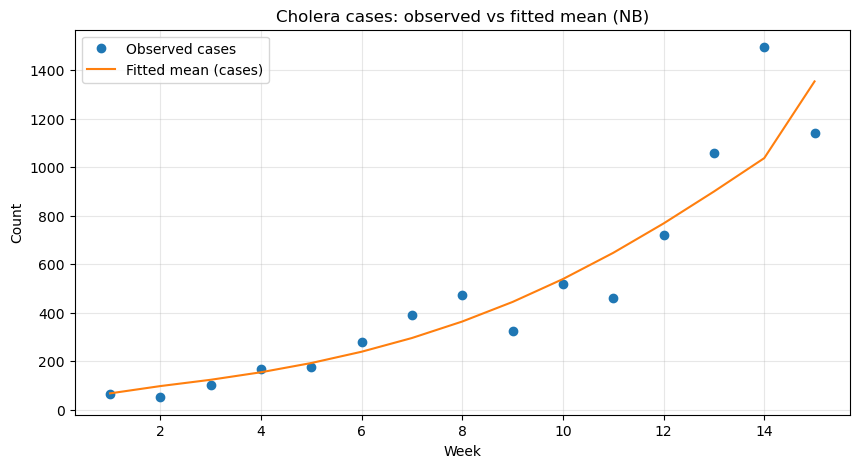

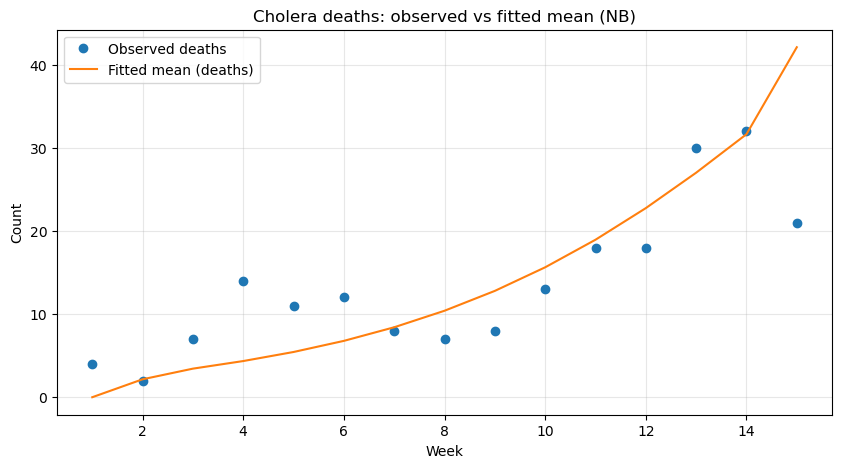

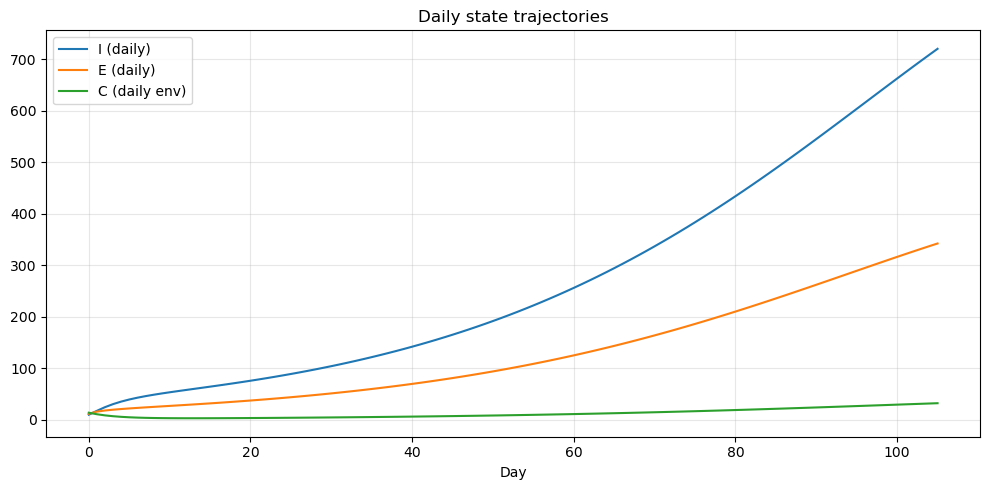

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Cholera SEIR + Environment (daily) with weekly aggregation and
joint Negative-Binomial likelihood for cases & deaths.

- Force of infection: lambda = beta1 * I/N + beta2 * C/(K + C)
- Environment: dC/dt = xi * I - delta * C
- Weekly incidence = integral_{week} (sigma * E(t)) dt
- Cases_w ~ NegBin( rho * Inc_w,  k_cases )
- Deaths_w ~ NegBin( CFR * rho_d * Inc_{w - tau},  k_deaths )

Use L-BFGS-B to maximize the joint log-likelihood with biological bounds.

Requires: numpy, scipy, matplotlib
"""

import numpy as np
from dataclasses import dataclass
from typing import Tuple, Dict
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.special import gammaln
import matplotlib.pyplot as plt

# ----------------------------
# 1) Data (replace as needed)
# ----------------------------
weeks = np.arange(1, 16)
cases_obs = np.array([
    64, 52, 101, 168, 175,
    279, 393, 472, 324, 517,
    460, 722, 1059, 1495, 1140
], dtype=float)
deaths_obs = np.array([
    4, 2, 7, 14, 11,
    12, 8, 7, 8, 13,
    18, 18, 30, 32, 21
], dtype=float)

# Population at risk (adjust to your setting)
N_POP = 250_000.0

# ----------------------------
# 2) Model definitions
# ----------------------------
@dataclass
class Params:
    beta1: float      # direct transmission (per day)
    beta2: float      # env transmission strength (per day)
    sigma: float      # 1/incubation (per day)
    gamma: float      # recovery (per day)
    xi: float         # contamination rate to environment
    delta: float      # decay rate of environment
    K: float          # half-sat constant for environment
    rho: float        # case reporting fraction (0-1)
    rho_d: float      # death reporting fraction (0-1)
    CFR: float        # case fatality ratio (0-1)
    tau_days: float   # mean delay from onset to death (days)
    I0: float         # initial infectious persons
    E0: float         # initial exposed
    C0: float         # initial environmental load
    k_cases: float    # NB dispersion for cases (size parameter, >0)
    k_deaths: float   # NB dispersion for deaths (size parameter, >0)

def rhs(t, y, p: Params, N: float):
    S, E, I, R, C = y
    lam = p.beta1 * I / N + p.beta2 * (C / (p.K + C))
    dS = -lam * S
    dE = lam * S - p.sigma * E
    dI = p.sigma * E - p.gamma * I
    dR = p.gamma * I
    dC = p.xi * I - p.delta * C
    return [dS, dE, dI, dR, dC]

def simulate_daily_to_weekly(p: Params, N: float, n_weeks: int) -> Dict[str, np.ndarray]:
    """Integrate in days; compute weekly incidence and lagged deaths mean."""
    days = int(n_weeks * 7)
    t_eval = np.arange(0, days + 1)  # daily grid
    
    S0 = N - p.I0 - p.E0
    y0 = [S0, p.E0, p.I0, 0.0, p.C0]
    
    sol = solve_ivp(rhs, (0, days), y0, args=(p, N), t_eval=t_eval, method="LSODA", rtol=1e-6, atol=1e-9)
    if not sol.success:
        raise RuntimeError("ODE solver failed")
    S, E, I, R, C = sol.y
    
    # daily incidence = sigma * E (new infections entering I)
    daily_inc = p.sigma * E  # per day
    
    # aggregate to weeks (sum over each 7-day block)
    weekly_inc = np.add.reduceat(daily_inc, np.arange(0, days, 7))[:n_weeks]
    
    # expected cases per week (apply reporting fraction)
    mean_cases = p.rho * weekly_inc
    
    # expected deaths: lagged incidence by tau_days, then CFR and death-reporting
    lag_days = max(0.0, p.tau_days)
    # Create a shifted version of daily incidence using linear interpolation
    t_days = np.arange(daily_inc.size)
    shifted_inc = np.interp(t_days - lag_days, t_days, daily_inc, left=0.0, right=0.0)
    weekly_shifted = np.add.reduceat(shifted_inc, np.arange(0, days, 7))[:n_weeks]
    mean_deaths = p.CFR * p.rho_d * weekly_shifted
    
    return {
        "weekly_inc": weekly_inc,
        "mean_cases": mean_cases,
        "mean_deaths": mean_deaths,
        "daily": {"t": t_eval, "S": S, "E": E, "I": I, "R": R, "C": C}
    }

# ----------------------------
# 3) Likelihood (Negative Binomial)
# ----------------------------
def nb_logpmf(y, mean, k):
    """Negative binomial log pmf with mean-variance: Var = mean + mean^2/k"""
    eps = 1e-12
    mean = np.maximum(mean, eps)
    k = np.maximum(k, eps)
    return (gammaln(k + y) - gammaln(k) - gammaln(y + 1.0)
            + k * np.log(k / (k + mean)) + y * np.log(mean / (k + mean)))

def joint_negloglik(theta, weeks, cases, deaths, N):
    # unpack bounded params
    (beta1, beta2, sigma, gamma, xi, delta, K,
     rho, rho_d, CFR, tau_days, I0, E0, C0, k_cases, k_deaths) = theta
    
    p = Params(beta1, beta2, sigma, gamma, xi, delta, K, rho, rho_d, CFR, tau_days,
               I0, E0, C0, k_cases, k_deaths)
    n_weeks = len(weeks)
    try:
        sim = simulate_daily_to_weekly(p, N, n_weeks)
    except Exception:
        return 1e12  # penalize solver failures
    
    mean_cases = sim["mean_cases"]
    mean_deaths = sim["mean_deaths"]
    
    ll_cases = nb_logpmf(cases, mean_cases, k_cases).sum()
    ll_deaths = nb_logpmf(deaths, mean_deaths, k_deaths).sum()
    return -(ll_cases + ll_deaths)

# ----------------------------
# 4) Optimization setup
# ----------------------------
# Reasonable starting values (per day)
theta0 = np.array([
    0.6,   # beta1
    0.3,   # beta2
    1.0,   # sigma  (incubation ~1 day)
    0.4,   # gamma  (infectious ~2.5 days)
    0.1,   # xi
    0.4,   # delta  (env half-life ~ ln2/0.4 ≈ 1.7 d)
    1e3,   # K
    0.5,   # rho
    0.9,   # rho_d
    0.01,  # CFR (1%)
    7.0,   # tau_days
    10.0,  # I0
    10.0,  # E0
    10.0,  # C0
    50.0,  # k_cases (higher = less overdispersion)
    50.0   # k_deaths
])

# Bounds (lower, upper) — biologically justified
bounds = [
    (0.05, 3.0),   # beta1
    (0.0,  3.0),   # beta2
    (0.5,  2.0),   # sigma
    (0.2,  0.7),   # gamma
    (0.01, 1.0),   # xi
    (0.1,  1.5),   # delta
    (10.0, 1e5),   # K
    (0.2,  0.9),   # rho
    (0.5,  1.0),   # rho_d
    (0.003,0.03),  # CFR
    (5.0,  10.0),  # tau_days
    (1.0,  50.0),  # I0
    (1.0,  50.0),  # E0
    (0.0,  100.0), # C0
    (1.0,  500.0), # k_cases
    (1.0,  500.0)  # k_deaths
]

res = minimize(
    joint_negloglik, theta0,
    args=(weeks, cases_obs, deaths_obs, N_POP),
    method="L-BFGS-B",
    bounds=bounds,
    options=dict(maxiter=2000, ftol=1e-9)
)

print("Optimization success:", res.success)
print("Message:", res.message)
theta_hat = res.x
param_names = ["beta1","beta2","sigma","gamma","xi","delta","K","rho","rho_d","CFR","tau_days","I0","E0","C0","k_cases","k_deaths"]
for name, val, (lo, hi) in zip(param_names, theta_hat, bounds):
    print(f"{name:>8s} = {val:.4g}  (bounds [{lo}, {hi}])")

# ----------------------------
# 5) Fitted trajectories & plots
# ----------------------------
(beta1, beta2, sigma, gamma, xi, delta, K,
 rho, rho_d, CFR, tau_days, I0, E0, C0, k_cases, k_deaths) = theta_hat
p_hat = Params(beta1, beta2, sigma, gamma, xi, delta, K, rho, rho_d, CFR, tau_days, I0, E0, C0, k_cases, k_deaths)

sim_hat = simulate_daily_to_weekly(p_hat, N_POP, len(weeks))

mean_cases = sim_hat["mean_cases"]
mean_deaths = sim_hat["mean_deaths"]

# Plot: Cases
plt.figure(figsize=(10,5))
plt.plot(weeks, cases_obs, 'o', label='Observed cases')
plt.plot(weeks, mean_cases, '-', label='Fitted mean (cases)')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Cholera cases: observed vs fitted mean (NB)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot: Deaths
plt.figure(figsize=(10,5))
plt.plot(weeks, deaths_obs, 'o', label='Observed deaths')
plt.plot(weeks, mean_deaths, '-', label='Fitted mean (deaths)')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Cholera deaths: observed vs fitted mean (NB)')
plt.grid(True, alpha=0.3)
plt.legend()

# Optional: daily trajectories
t = sim_hat["daily"]["t"]
I = sim_hat["daily"]["I"]
E = sim_hat["daily"]["E"]
C = sim_hat["daily"]["C"]
plt.figure(figsize=(10,5))
plt.plot(t, I, label='I (daily)')
plt.plot(t, E, label='E (daily)')
plt.plot(t, C, label='C (daily env)')
plt.xlabel('Day')
plt.title('Daily state trajectories')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()